# K Nearest Neighbors (KNN)

In [8]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Importing Bank_Personal_Loan_Modelling.csv dataset
df = pd.read_csv("/content/sample_data/Bank_Personal_Loan_Modelling.csv")

In [4]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# View dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Feature extraction
# Dividing the data into X,y
inputs = df.drop('Personal Loan',axis='columns')
target = df['Personal Loan']

In [9]:
# Creating objects of labelEncoder class
le_age = LabelEncoder()
le_exp = LabelEncoder()
le_income = LabelEncoder()
le_family = LabelEncoder()
le_ccavg = LabelEncoder()
le_edu = LabelEncoder()
le_mortgage = LabelEncoder()
le_secAccounts = LabelEncoder()
le_CDAcc = LabelEncoder()
le_online = LabelEncoder()
le_creditCard = LabelEncoder()

In [10]:
inputs['age_n'] = le_age.fit_transform(inputs['Age'])
inputs['exp_n'] = le_exp.fit_transform(inputs['Experience'])
inputs['income_n'] = le_income.fit_transform(inputs['Income'])
inputs['family_n'] = le_family.fit_transform(inputs['Family'])
inputs['ccavg_n'] = le_ccavg.fit_transform(inputs['CCAvg'])
inputs['edu_n'] = le_edu.fit_transform(inputs['Education'])
inputs['mortgage_n'] = le_mortgage.fit_transform(inputs['Mortgage'])
inputs['secAcc_n'] = le_secAccounts.fit_transform(inputs['Securities Account'])
inputs['CDAcc_n'] = le_CDAcc.fit_transform(inputs['CD Account'])
inputs['online_n'] = le_online.fit_transform(inputs['Online'])
inputs['creditCard_n'] = le_creditCard.fit_transform(inputs['CreditCard'])

In [11]:
inputs.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,...,exp_n,income_n,family_n,ccavg_n,edu_n,mortgage_n,secAcc_n,CDAcc_n,online_n,creditCard_n
0,1,25,1,49,91107,4,1.6,1,0,1,...,4,33,3,19,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,...,22,22,2,18,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,...,18,3,0,12,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,...,12,74,0,34,1,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,...,11,31,3,12,1,0,0,0,0,1


In [13]:
# X : Features
# y : Target
features = ["Age", "Experience", "Income", "Family", "CCAvg", "Mortgage", "Securities Account", "CD Account", "Online", "CreditCard"]
X = df[features]
y = df["Personal Loan"]

In [14]:
# View the data X, y
display(X.head(3), y.head(3))

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,0,1,0,0,0
1,45,19,34,3,1.5,0,1,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0


0    0
1    0
2    0
Name: Personal Loan, dtype: int64

In [15]:
# Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [16]:
# Building the model
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [17]:
# Fittng the model on train set
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Model score on training set
knn_classifier.score(X_train,y_train)

0.93725

In [19]:
# Model score on testing set
knn_classifier.score(X_test,y_test)

0.906

In [20]:
# Testing using testing set
y_pred = knn_classifier.predict(X_test)
print("Predicted Values : ",y_pred)

Predicted Values :  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

In [21]:
# Evaluating the model by its accuracy
nb_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",nb_accuracy)

Accuracy:  0.906


In [22]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report: \n",class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       895
           1       0.60      0.32      0.42       105

    accuracy                           0.91      1000
   macro avg       0.76      0.65      0.68      1000
weighted avg       0.89      0.91      0.89      1000



Confusion Matrix: 
 [[872  23]
 [ 71  34]]


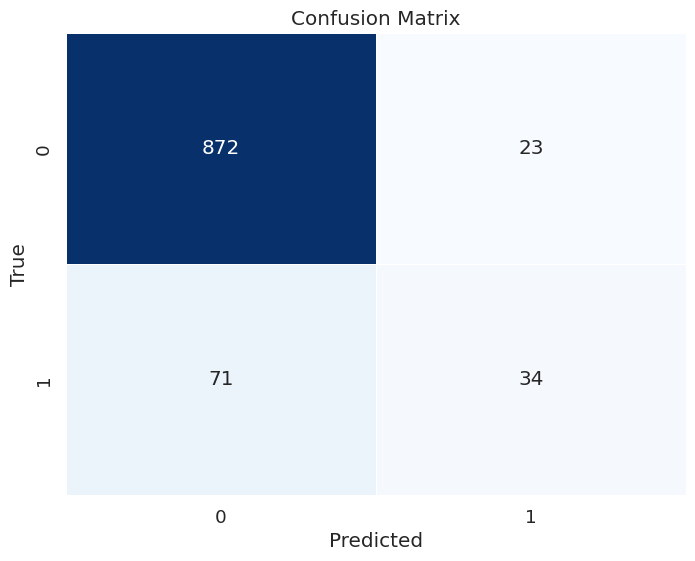

In [23]:
# Confusion matrics
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",conf_matrix)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_df

,Actual,Predicted
1501,0,0
2586,1,0
2653,0,0
1055,0,0
705,0,0
...,...,...
4711,0,0
2313,0,0
3214,0,0
2732,0,0
